In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
sys.path.append(os.path.abspath(os.path.join('../scripts/')))
warnings.filterwarnings('ignore')
from exploration import DataExploration


In [2]:
sns.set(rc={"figure.figsize": (10, 15)})


In [6]:
traindf=pd.read_csv('../data/train.csv')
testdf=pd.read_csv('../data/test.csv')
storedf=pd.read_csv('../data/store.csv')
sampledf = pd.read_csv("../data/sample_submission.csv")


In [4]:
data_exploration_train = DataExploration(traindf)
data_exploration_test = DataExploration(testdf)
data_exploration_store = DataExploration(storedf)

In [6]:
storedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [7]:
storedf.isnull().sum().sort_values(ascending=False)

Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
CompetitionDistance            3
Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
dtype: int64

<AxesSubplot:>

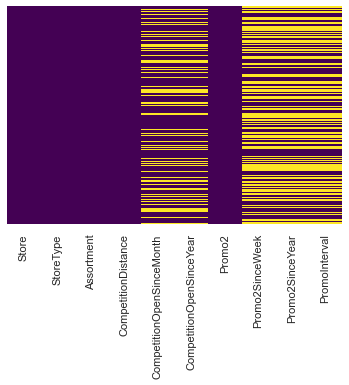

In [8]:
sns.heatmap(storedf.isnull(), cbar=False, cmap='viridis', yticklabels=False, cbar_kws={'label': 'Null'})


In [9]:
storedf.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
data_exploration_train.get_info()
data_exploration_train.get_count('Store')
data_exploration_train.get_null_count('Open')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [11]:
traindf["Store"].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115], dtype=int64)

In [12]:
mergeddf=pd.merge(traindf, storedf, on='Store')


In [8]:
testdf

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [7]:
sampledf

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [13]:
mergeddf['StateHoliday']=mergeddf['StateHoliday'].astype(str)
data_exploration_train.transform_date(mergeddf)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,30
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,29
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,28
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,...,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,5
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,...,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,4
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,...,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,3
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,...,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2


# EDA

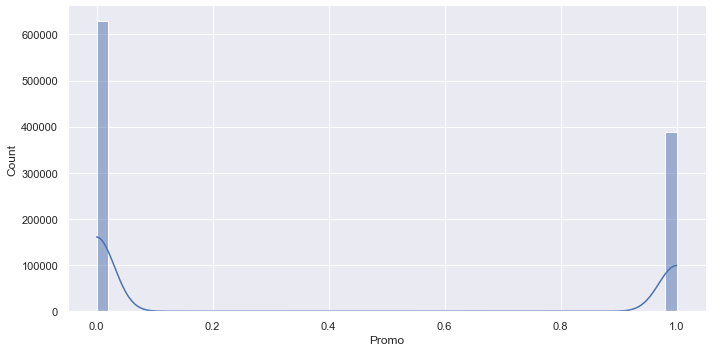

In [14]:

sns.displot(traindf, x="Promo",aspect=2,kde=True)

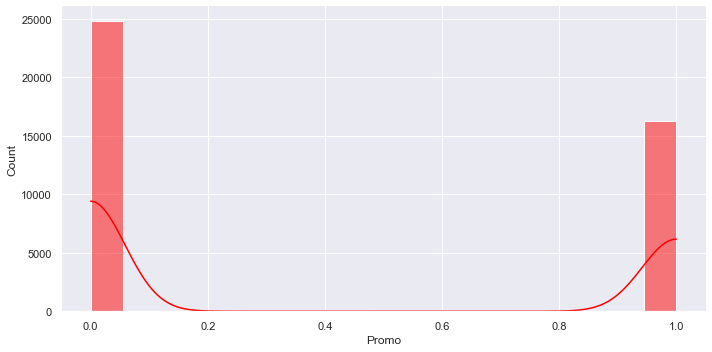

In [15]:

sns.displot(testdf, x="Promo", color = "red",aspect=2,kde=True)


<h2>Sales behavior before, during and after holidays</h2>

<h3>1.Christmas</h3>

In [16]:
def Christmas_Season_Sales(year:str,nextyear:str):
    

    before_dates = (mergeddf["Date"] >= pd.to_datetime(f"{year}-12-10")) & (
        mergeddf["Date"] < pd.to_datetime(f"{year}-12-25")
    )
    before_xmas = mergeddf[before_dates].groupby("Date").agg({"Sales": "mean"})

    during_dates = (mergeddf["Date"] >= pd.to_datetime(f"{year}-12-25")) & (
        mergeddf["Date"] < pd.to_datetime(f"{year}-12-31")
    )
    during_xmas = mergeddf[during_dates].groupby("Date").agg({"Sales": "mean"})

    after_dates = (mergeddf["Date"] >= pd.to_datetime(f"{nextyear}-01-01")) & (
        mergeddf["Date"] < pd.to_datetime(f"{nextyear}-01-16")
    )
    after_xmas = mergeddf[after_dates].groupby("Date").agg({"Sales": "mean"})
    
    return before_xmas, during_xmas, after_xmas





In [17]:
def holiday_lineplot(before_holiday, during_holiday, after_holiday,title):
    plt.figure(figsize=(12, 6))

    sns.lineplot(
        x=before_holiday.index, y=before_holiday["Sales"], label="Before", color="blue"
    )
    sns.lineplot(
        x=during_holiday.index, y=during_holiday["Sales"], label="During", color="red"
    )
    sns.lineplot(
        x=after_holiday.index, y=after_holiday["Sales"], label="After", color="green"
    )

    plt.title(f"{title}", size=20)
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(xlabel="Date", fontsize=16)
    plt.ylabel(ylabel="Avg Sales", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.show()
    

<h4>2013/2014</h4>

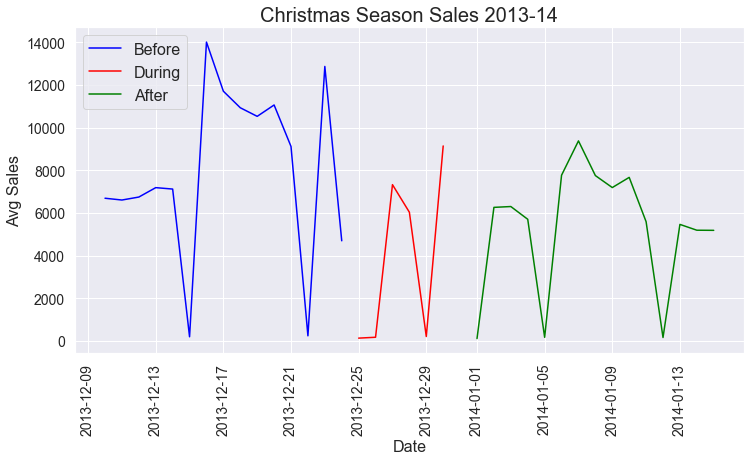

In [18]:
before_xmas_13, during_xmas_13, after_xmas_13=Christmas_Season_Sales("2013","2014")

holiday_lineplot(before_xmas_13, during_xmas_13, after_xmas_13,"Christmas Season Sales 2013-14")



<h4>2014/2015</h4>

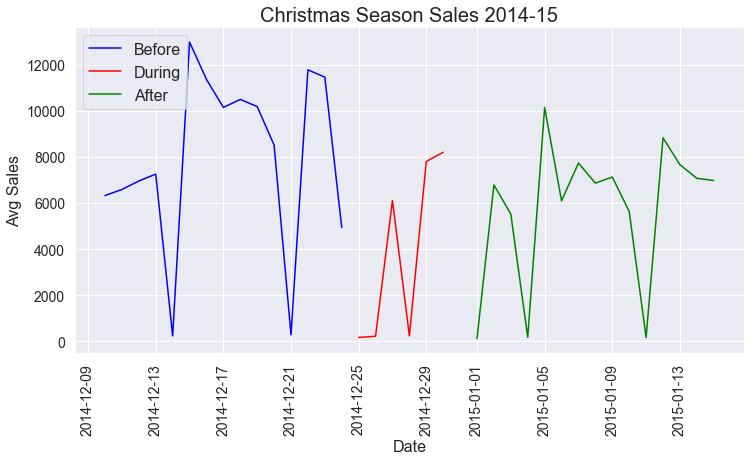

In [19]:
before_xmas_14, during_xmas_14, after_xmas_14= Christmas_Season_Sales("2014", "2015")

holiday_lineplot(before_xmas_14, during_xmas_14, after_xmas_14,"Christmas Season Sales 2014-15")


<h3>Easter</h3>

In [20]:
mergeddf[(mergeddf["StateHoliday"]=='b') & (mergeddf["Year"]==2013)].head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
851,1,1,2013-04-01,0,0,0,0,b,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013,4,1
854,1,5,2013-03-29,0,0,0,1,b,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2013,3,29


In [21]:
def Easter_Season_Sales(year: str):

    before_dates = (mergeddf["Date"] >= pd.to_datetime(f"{year}-03-10")) & (
        mergeddf["Date"] < pd.to_datetime(f"{year}-03-27")
    )
    before_easter = mergeddf[before_dates].groupby("Date").agg({"Sales": "mean"})

    during_dates = (mergeddf["Date"] >= pd.to_datetime(f"{year}-03-28")) & (
        mergeddf["Date"] < pd.to_datetime(f"{year}-04-03")
    )
    during_easter = mergeddf[during_dates].groupby("Date").agg({"Sales": "mean"})

    after_dates = (mergeddf["Date"] >= pd.to_datetime(f"{year}-04-03")) & (
        mergeddf["Date"] < pd.to_datetime(f"{year}-04-16")
    )
    after_easter = mergeddf[after_dates].groupby("Date").agg({"Sales": "mean"})

    return before_easter, during_easter, after_easter


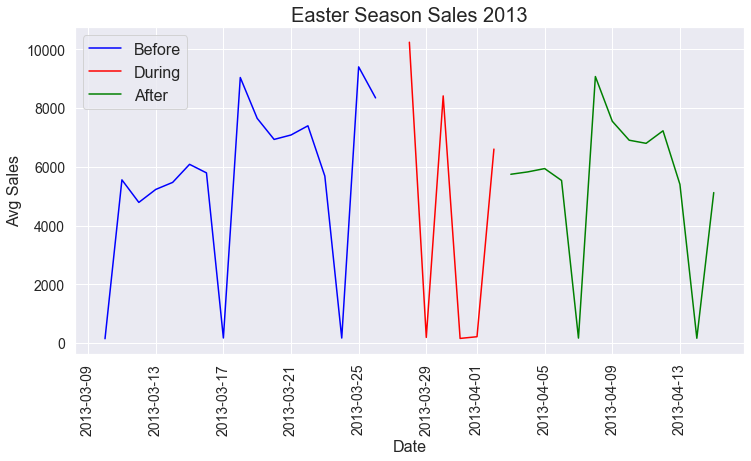

In [22]:
before_easter, during_easter, after_easter = Easter_Season_Sales("2013")
holiday_lineplot(
    before_easter, during_easter, after_easter, "Easter Season Sales 2013"
)


<h3>On School Holidays</h3>

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

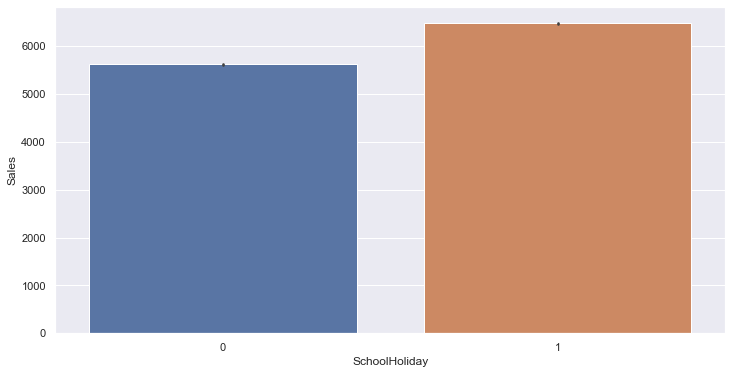

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x="SchoolHoliday", y="Sales", data=traindf)

<AxesSubplot:xlabel='StateHoliday', ylabel='Sales'>

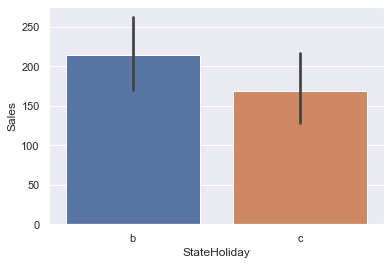

In [24]:
trdf = traindf.loc[(traindf["StateHoliday"] == "b") | (traindf["StateHoliday"] == "c")]

sns.barplot(x="StateHoliday", y="Sales", data=trdf)


<h2>The correlation between sales and number of customers</h2>

<AxesSubplot:>

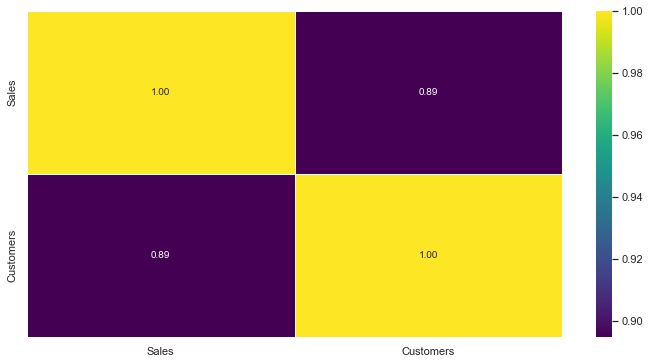

In [25]:
correlations=traindf[["Sales", "Customers"]].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlations, annot=True, cmap='viridis', fmt='.2f', linewidths=.5,)


<AxesSubplot:xlabel='Customers', ylabel='Sales'>

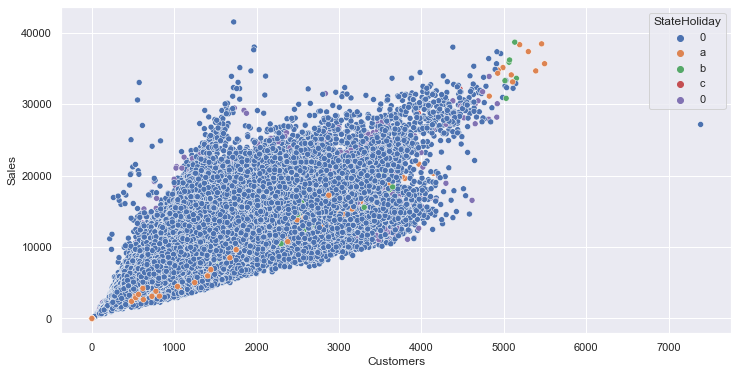

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Customers", y="Sales", data=traindf, hue="StateHoliday",)


<h2>How does promo affect sales?</h2>

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

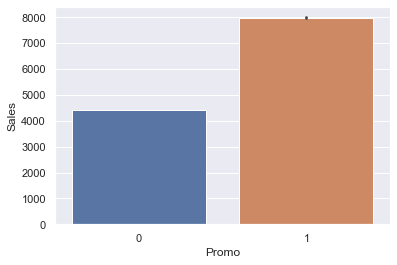

In [27]:

sns.barplot(x="Promo", y="Sales", data=mergeddf)

<h3>Difference between different store types</h3>

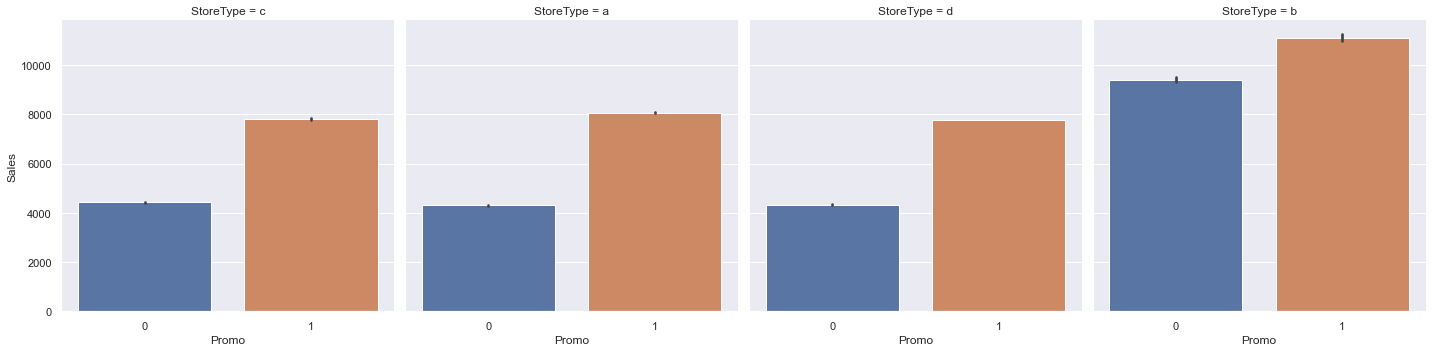

In [28]:

sns.factorplot(x="Promo", y="Sales", data=mergeddf, col="StoreType", kind="bar")


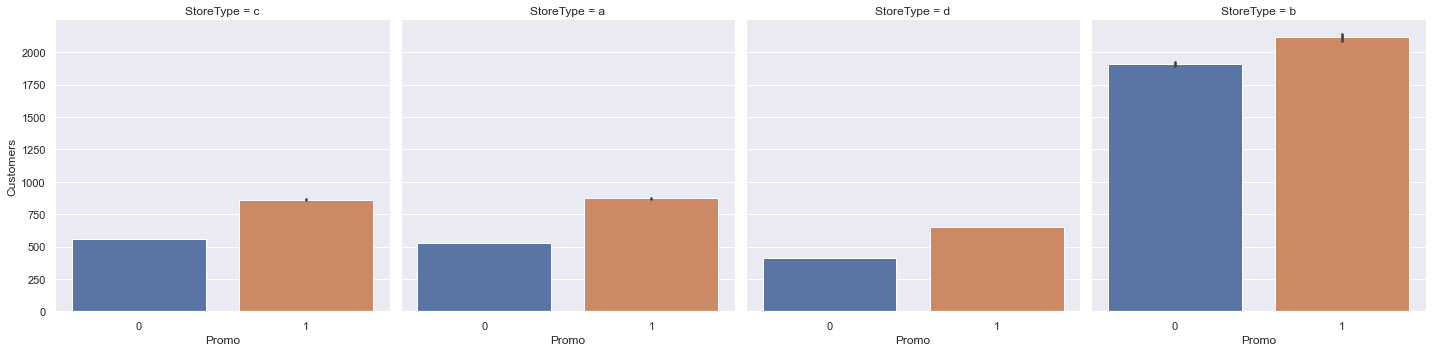

In [29]:
sns.factorplot(x="Promo", y="Customers", data=mergeddf, col="StoreType", kind="bar")


<h5>observation</h5>
<ul>The margin of promo effect on store type-b is very much less than the other types</ul>
<ul>Applying Promo Code to to type b may not a needed result</ul>

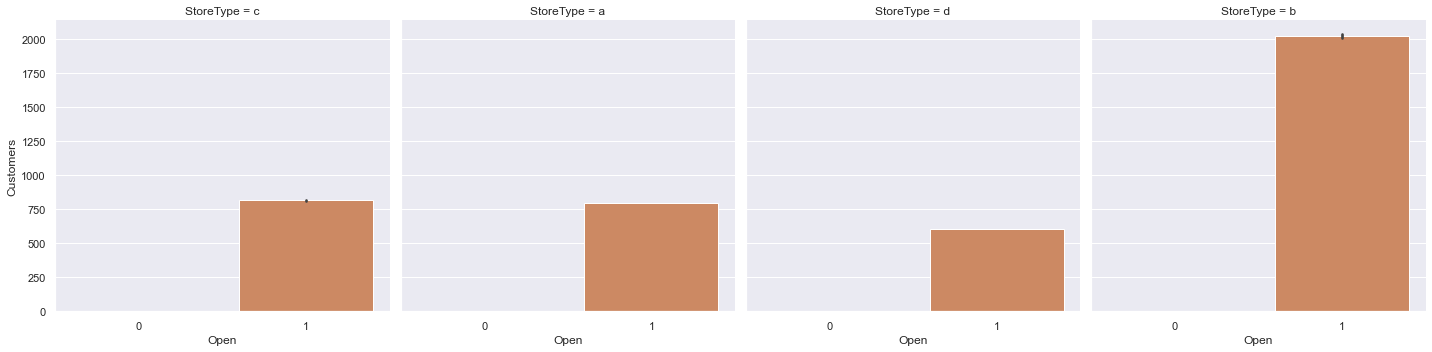

In [30]:
sns.factorplot(x="Open", y="Customers", data=mergeddf, col="StoreType", kind="bar")

In [31]:
non_holiday_sales = mergeddf[mergeddf["StateHoliday"] == "0"]
week_sales = non_holiday_sales[non_holiday_sales["DayOfWeek"] < 6]

not_open_all_week_days_sales = week_sales[week_sales["Open"] == 0]["Store"].unique().tolist()

week_day_stores = storedf[~storedf["Store"].isin(not_open_all_week_days_sales)]
non_week_day_stores = storedf[storedf["Store"].isin(not_open_all_week_days_sales)]

print("Stores that are open in all week days")
display(week_day_stores)
print(f"Number of stores that open in all week days is {week_day_stores.shape[0]}")


Stores that are open in all week days


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


Number of stores that open in all week days is 927


In [32]:
non_holiday_sales["OpenAllWeekDay"] = non_holiday_sales["Store"].apply(
    lambda x: x in week_day_stores["Store"].to_list()
)
week_end_sales = non_holiday_sales[non_holiday_sales["DayOfWeek"] >= 6]
week_sales = non_holiday_sales[non_holiday_sales["DayOfWeek"] < 6]

week_end_sales_agg = week_end_sales.groupby("OpenAllWeekDay").agg(
    {"Sales": "mean", "Customers": "mean"}
)
week_sales_agg = week_sales.groupby("OpenAllWeekDay").agg(
    {"Sales": "mean", "Customers": "mean"}
)

week_x_col = [str(a) for a in week_end_sales_agg.index.to_list()]


<AxesSubplot:ylabel='Sales'>

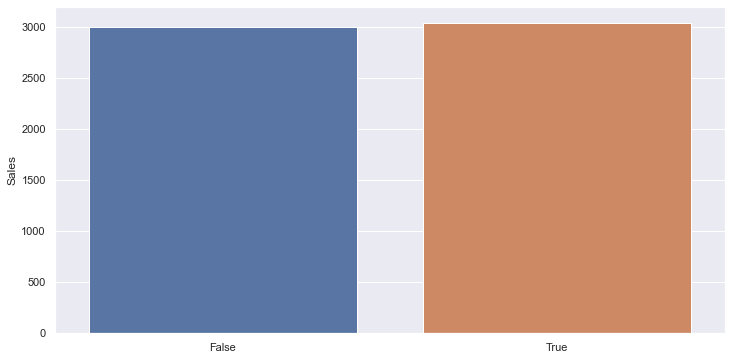

In [33]:

plt.figure(figsize=(12, 6))

sns.barplot(x=week_x_col, y="Sales", data=week_end_sales_agg)


<h2>Assortment Type</h2>

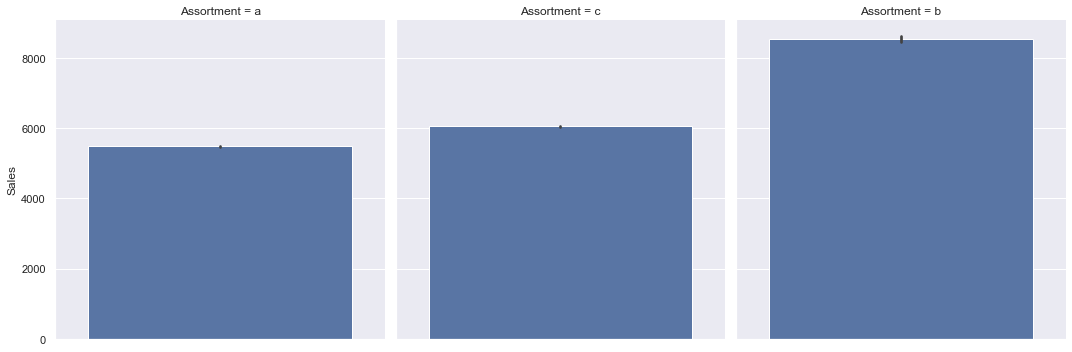

In [34]:
sns.factorplot( y="Sales", data=mergeddf, col="Assortment", kind="bar")


<AxesSubplot:xlabel='CompetitionDistance', ylabel='Sales'>

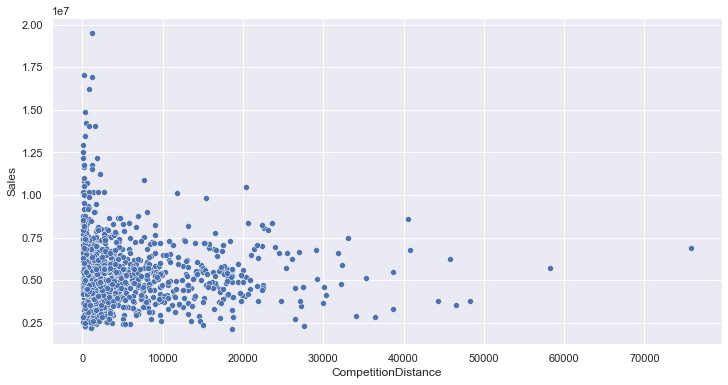

In [35]:

competition_df = mergeddf[["Store", "Sales", "Customers", "StoreType", "CompetitionDistance"]]
competition_df_agg = competition_df.groupby("Store").agg({"Sales": "sum", "Customers" : "sum",
                                                      "CompetitionDistance": lambda x: max(x)})
plt.figure(figsize=(12, 6))
sns.scatterplot(x="CompetitionDistance", y="Sales", data=competition_df_agg)


,Sales,CompetitionDistance
Sales,1.000000,-0.019229
CompetitionDistance,-0.019229,1.000000


<AxesSubplot:>

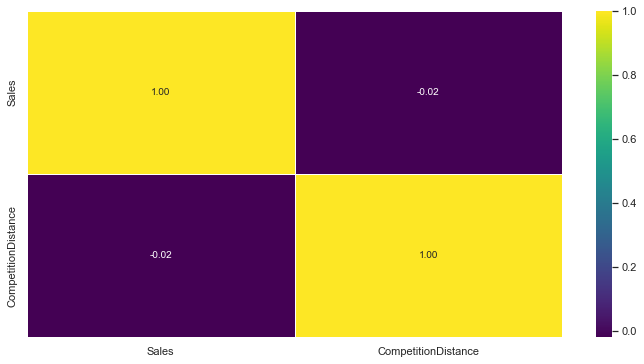

In [36]:

competition_df_corr = competition_df[["Sales", "CompetitionDistance"]].corr()
display(competition_df_corr)
plt.figure(figsize=(12, 6))
sns.heatmap(competition_df_corr,annot=True, cmap='viridis', fmt='.2f', linewidths=.5,)

<ul>Sales is not much affected by Competition Distance</ul>

In [38]:
# get stores where comdis=null and comdis not null

In [58]:
has_open_competition_df = mergeddf[mergeddf["CompetitionOpenSinceMonth"].notnull()]

has_open_competition_df["CompetitionOpenSinceYear"] = (
    has_open_competition_df["CompetitionOpenSinceYear"].astype("int").astype("str")
)
has_open_competition_df["CompetitionOpenSinceMonth"] = (
    has_open_competition_df["CompetitionOpenSinceMonth"].astype("int").astype("str")
)

has_open_competition_df["CompetitionOpenSinceDate"] = (
    has_open_competition_df["CompetitionOpenSinceYear"]
    + "-"
    + has_open_competition_df["CompetitionOpenSinceMonth"]
    + "-"
    + "01"
)
has_open_competition_df["CompetitionOpenSinceDate"] = pd.to_datetime(
    has_open_competition_df["CompetitionOpenSinceDate"]
)

competition_df = has_open_competition_df[
    ["Date", "Sales", "Store", "CompetitionOpenSinceDate"]
]


competition_df["BeforeCompetition"] = (
    competition_df["Date"] < competition_df["CompetitionOpenSinceDate"]
)

competition_df_agg = competition_df.groupby("BeforeCompetition").agg({"Sales": "mean"})


<AxesSubplot:ylabel='Sales'>

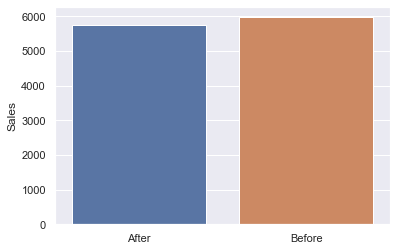

In [61]:
x_col = []
for val in competition_df_agg.index.to_list():
    if val:
        x_col.append("Before")
    else:
        x_col.append("After")
        
        
sns.barplot(x=x_col, y="Sales", data=competition_df_agg)


In [62]:
print("Overall avg sales before competition and after competition")
display(competition_df_agg)

decrease = competition_df_agg["Sales"][True] - competition_df_agg["Sales"][False]
decrease_percent = decrease / competition_df_agg["Sales"][True]

print(f"Overall avg sales decreased after competition by {decrease_percent * 100:.3f}%")

Overall avg sales before competition and after competition


,Sales
BeforeCompetition,
False,5753.971338
True,5974.642737


Overall avg sales decreased after competition by 3.693%


<h3>Observation</h3>
<ul>After new competition Sales has decreased by 3.6%</ul>